In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np

datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaGN_metGBA.csv')

#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [2]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Error promedio: ' + str(np.mean(errors)))
    print('Precision: ' + str(accuracy))
    return accuracy

In [3]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf") #poly exceso de tiempo
regressor.fit(X_train,y_train)
resultado = evaluate(regressor, X_test, y_test)

Error promedio: 9.561006844613102
Precision: 59.75882134897809


C:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel = "linear") 
regressor.fit(X_train,y_train)
resultado = evaluate(regressor, X_test, y_test)

Error promedio: 6.318519866425626
Precision: 74.78669756620857


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(n_splits=5)

score = regressor.score(X_train,y_train)
print("Metrica del modelo", score)

scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='r2')
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

y_pred = regressor.predict(X_test)
print(r2_score(y_pred, y_test))

Metrica del modelo 0.577076801945024
Metricas cross_validation [0.62176467 0.54892005 0.5934032  0.41888527 0.494455  ]
Media de cross_validation 0.5354856368302585
0.27330456071137266


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
kf = KFold(n_splits=5)

y_pred = regressor.predict(X_test)

scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred)))

Validacion cruzada:
Metricas cross_validation [0.62176467 0.54892005 0.5934032  0.41888527 0.494455  ]
Media de cross_validation 0.5354856368302585
Metricas sobre la prediccion
R^2: 0.5365375034919225
MSE: 83.6463841022543
RMSE: 9.145839715534834


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_mod = sc_X.fit_transform(X_train)
X_test_mod = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train_mod = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_mod = sc_y.transform(y_test.reshape(-1, 1))

In [8]:
def evaluate2(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions = sc_y.inverse_transform(predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Error promedio: ' + str(np.mean(errors)))
    print('Precision: ' + str(accuracy))
    return accuracy

In [9]:
regressor_mod = SVR(kernel = "rbf") 
regressor_mod.fit(X_train_mod,y_train_mod)
resultado = evaluate2(regressor_mod, X_test_mod, y_test)

Error promedio: 6.177981674742949
Precision: 76.8738466420771


C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
score = regressor_mod.score(X_train_mod, y_train_mod)
print("Metrica del modelo", score)

scores = cross_val_score(regressor_mod, X_train_mod, y_train_mod, cv=kf, scoring='r2')
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

y_pred = regressor_mod.predict(X_test_mod)
print(r2_score(y_pred, y_test_mod))

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Metrica del modelo 0.6405188785990991
Metricas cross_validation [0.36278774 0.50566937 0.39726208 0.52195172 0.45980856]
Media de cross_validation 0.44949589515596156
-0.09051586430395919


C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for 

In [13]:
y_pred_mod = regressor_mod.predict(X_test_mod)

scores = cross_val_score(regressor, X_train_mod, y_train_mod, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(sc_y.inverse_transform(y_test_mod), sc_y.inverse_transform(y_pred_mod)))
print('MSE:',mean_squared_error(sc_y.inverse_transform(y_test_mod), sc_y.inverse_transform(y_pred_mod)))
print('RMSE:',sqrt(mean_squared_error(sc_y.inverse_transform(y_test_mod), sc_y.inverse_transform(y_pred_mod))))

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validacion cruzada:
Metricas cross_validation [0.6200022  0.55333884 0.58868765 0.40524122 0.5001136 ]
Media de cross_validation 0.5334767015702603
Metricas sobre la prediccion
R^2: 0.4858528588645329
MSE: 92.79402233518951
RMSE: 9.632965396760724


C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


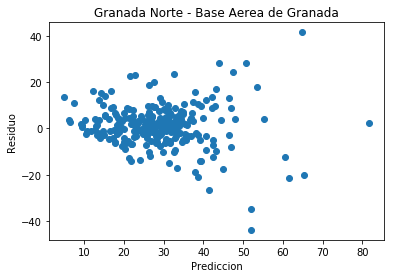

In [18]:
from matplotlib import pyplot as plt
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Granada Norte - Base Aerea de Granada')
plt.show()